In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip

--2021-03-17 18:39:47--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  9.99MB/s    in 1.0s    

2021-03-17 18:39:48 (9.99 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



In [ ]:
!ls -alrt

total 10388
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
drwxr-xr-x 4 root root     4096 Mar  5 14:36 .config
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data
drwxr-xr-x 1 root root     4096 Mar 17 18:29 ..
drwx------ 5 root root     4096 Mar 17 18:32 drive
-rw-r--r-- 1 root root        0 Mar 17 18:40 ecg_final.txt
drwxr-xr-x 1 root root     4096 Mar 17 18:40 .


In [ ]:
from zipfile import ZipFile 
file_name = "/content/ECG5000.zip"

In [ ]:
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 
  
    print('Extracting all the files now...') 
    zip.extractall()

File Name                                             Modified             Size
ECG5000.txt                                    2019-08-09 16:28:34           38
ECG5000_TEST.arff                              2019-08-09 16:28:34      7086857
ECG5000_TEST.txt                               2019-08-09 16:28:36     10156500
ECG5000_TRAIN.arff                             2019-08-09 16:28:36       790229
ECG5000_TRAIN.txt                              2019-08-09 16:28:36      1128500
ECG5000_TEST.ts                                2019-08-09 16:28:36      7083409
ECG5000_TRAIN.ts                               2019-08-09 16:28:38       786781
Extracting all the files now...


In [ ]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt


In [ ]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
df = pd.read_csv('ecg_final.txt', delim_whitespace=True, header = None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
df = df.add_prefix('c')

In [ ]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:, 0:1], test_size = 0.2, random_state = 111)

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [ ]:
trained_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [ ]:
normal_train_data = pd.DataFrame(trained_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(trained_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [ ]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


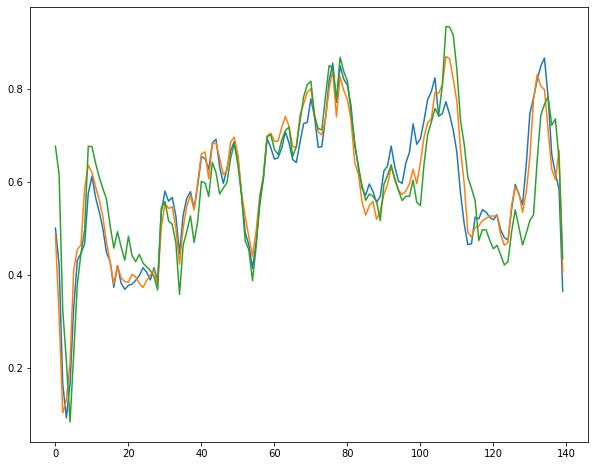

In [ ]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

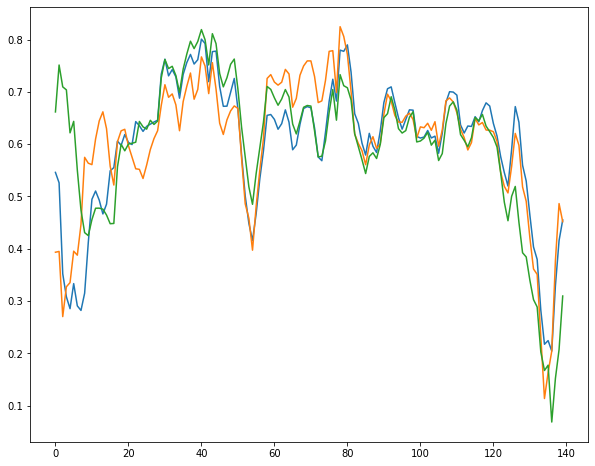

In [ ]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(140, activation = 'sigmoid'))

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dense(16, activation = 'relu'),
      tf.keras.layers.Dense(8, activation = 'relu')                                
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation = 'relu'),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(140, activation = 'sigmoid')                               
  ])
  
  def call (self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
Model = AutoEncoder()
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode = 'min')
Model.compile(optimizer='adam', loss='mae')

In [ ]:
history = Model.fit(normal_train_data, normal_train_data, 
                    epochs = 50, batch_size=128, 
                    validation_data = (trained_data_scaled[:,1:], trained_data_scaled[:,1:]),
                    shuffle = True) 
                    #callbacks = [early_stopping])
                    

Epoch 1/50
19/19 [==============================] - 1s 13ms/step - loss: 0.1300 - val_loss: 0.1100
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0894 - val_loss: 0.0831
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0580 - val_loss: 0.0768
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0488 - val_loss: 0.0743
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0482 - val_loss: 0.0737
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.0733
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0466 - val_loss: 0.0728
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0464 - val_loss: 0.0720
Epoch 9/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.0697
Epoch 10/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0659
Epoch 11/50
19/19 

In [ ]:
encoder_out = Model.encoder(normal_test_data).numpy()
decoder_out = Model.decoder(encoder_out).numpy()

In [ ]:
encoder_out.shape

(563, 8)

In [ ]:
decoder_out.shape

(563, 140)

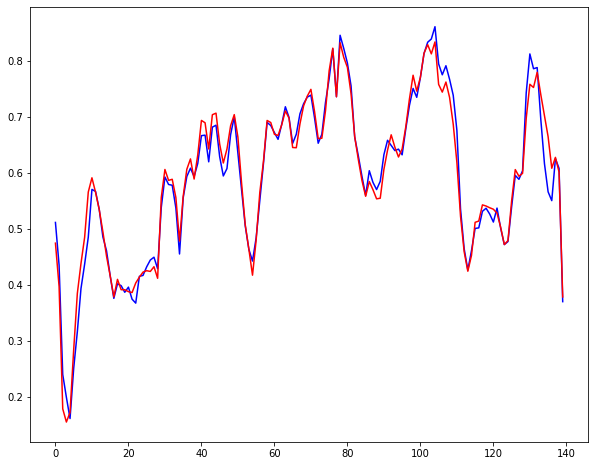

In [ ]:
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [ ]:
encoder_out_anomaly = Model.encoder(anomaly_test_data).numpy()
decoder_out_anomaly = Model.decoder(encoder_out_anomaly).numpy()

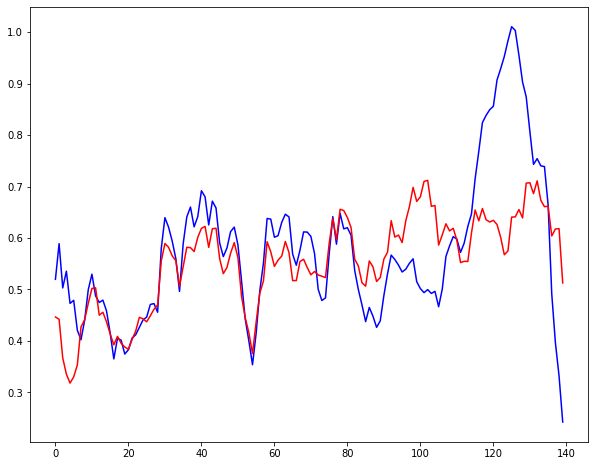

In [ ]:
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_anomaly[0], 'r')

(array([ 5., 18., 26., 39., 51., 65., 52., 45., 52., 34., 29., 23., 15.,
        18., 13., 11.,  8., 12.,  9.,  5.,  5.,  5.,  5.,  1.,  2.,  2.,
         2.,  1.,  0.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.01111281, 0.01273673, 0.01436064, 0.01598456, 0.01760848,
        0.0192324 , 0.02085631, 0.02248023, 0.02410415, 0.02572807,
        0.02735199, 0.0289759 , 0.03059982, 0.03222374, 0.03384766,
        0.03547157, 0.03709549, 0.03871941, 0.04034333, 0.04196724,
        0.04359116, 0.04521508, 0.046839  , 0.04846291, 0.05008683,
        0.05171075, 0.05333467, 0.05495859, 0.0565825 , 0.05820642,
        0.05983034, 0.06145426, 0.06307817, 0.06470209, 0.06632601,
        0.06794993, 0.06957384, 0.07119776, 0.07282168, 0.0744456 ,
        0.07606951, 0.07769343, 0.07931735, 0.08094127, 0.08256519,
        0.0841891 , 0.08581302, 0.08743694, 0.08906086, 0.09068477,
        0.09230869]),
 <a list of 50

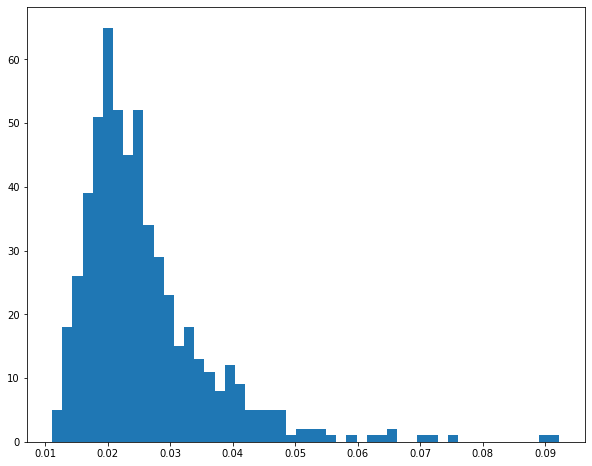

In [ ]:
reconstructions = Model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(train_loss, bins= 50)

In [ ]:
np.mean(train_loss)

0.025867059011168026

In [ ]:
np.std(train_loss)

0.010409457253935854

In [ ]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [ ]:
threshold

0.046685973519039733

(array([ 1.,  0.,  0.,  0.,  4.,  3.,  1.,  5.,  1.,  8.,  3.,  7., 14.,
        22., 29., 38., 48., 50., 59., 33., 36., 32., 21.,  7.,  2.,  0.,
         1.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  3.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03269634, 0.03589755, 0.03909875, 0.04229995, 0.04550116,
        0.04870236, 0.05190357, 0.05510477, 0.05830597, 0.06150718,
        0.06470838, 0.06790959, 0.07111079, 0.07431199, 0.0775132 ,
        0.0807144 , 0.08391561, 0.08711681, 0.09031801, 0.09351922,
        0.09672042, 0.09992163, 0.10312283, 0.10632403, 0.10952524,
        0.11272644, 0.11592765, 0.11912885, 0.12233005, 0.12553126,
        0.12873246, 0.13193367, 0.13513487, 0.13833607, 0.14153728,
        0.14473848, 0.14793969, 0.15114089, 0.15434209, 0.1575433 ,
        0.1607445 , 0.16394571, 0.16714691, 0.17034811, 0.17354932,
        0.17675052, 0.17995173, 0.18315293, 0.18635413, 0.18955534,
        0.19275654]),
 <a list of 50

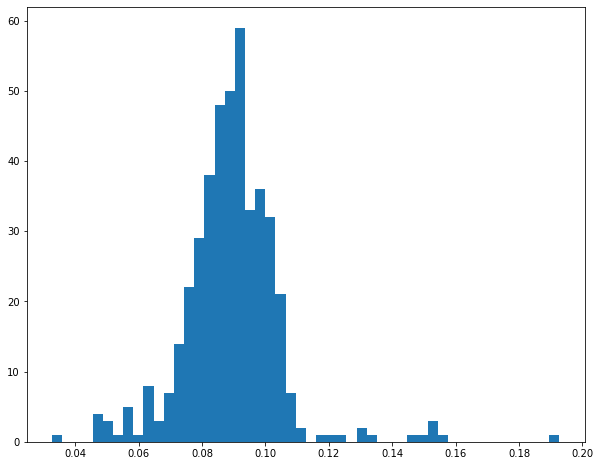

In [ ]:
reconstructions_anomaly = Model.predict(anomaly_test_data)
train_loss_anomaly = tf.keras.losses.mae(reconstructions_anomaly, anomaly_test_data)
plt.hist(train_loss_anomaly, bins = 50)

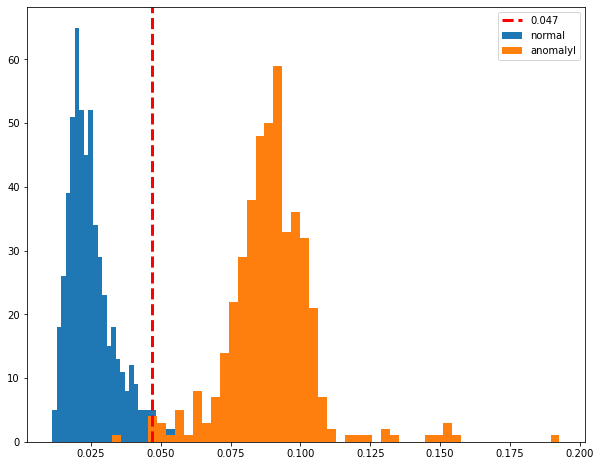

In [ ]:
plt.hist(train_loss, bins = 50, label = 'normal')
plt.hist(train_loss_anomaly, bins = 50, label = 'anomalyl')
plt.axvline(threshold, color= 'r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
np.mean(train_loss_anomaly)

0.08917428092307497

In [ ]:
np.std(train_loss_anomaly)

0.015515390334690739

In [ ]:
preds = tf.math.less(train_loss, threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=540>

In [ ]:
preds.shape

TensorShape([563])

In [ ]:
preds_anomaly = tf.math.greater(train_loss_anomaly, threshold)

In [ ]:
tf.math.count_nonzero(preds_anomaly)

<tf.Tensor: shape=(), dtype=int64, numpy=435>

In [ ]:
preds_anomaly.shape

TensorShape([437])